## COVID-19 Data Analysis
Dataset: covid_19_data.csv

Tasks:

1.Load and clean data.
2.Total confirmed, recovered, deaths globally.
3.Country with highest recovery rate.
4.Daily new confirmed cases in India (plot it).
5.Countries with 10K+ deaths.

In [1]:
# Import necessary libraries
import numpy as np              # for numerical operations 
import pandas as pd             # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization

In [2]:
# Define the file path using a raw string to handle windows backlashes
file_path = r"C:\Users\sanjay pallav\Documents\Python banny\Pandas_Mini_Projects\datasets\full_grouped.csv"

# 1.Load the dataset with UTF-8 encoding
data = pd.read_csv(file_path, encoding='utf-8')

# Display the first 5 rows to confirm successful loading
print("first 5 rows of the dataset:")
print(data.head())

first 5 rows of the dataset:
         Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa  


In [6]:
# 1.Cleaning the data

#check for any null values
data.isnull().sum()       # there are no null values

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [6]:
# 2.Checking Total confirmed, recovered, deaths globally

total_confirmed = data["Confirmed"].sum()
total_recovered = data["Recovered"].sum()
total_deaths = data["Deaths"].sum()
print(f" Total confirmed: {total_confirmed}")
print(f" Total recovered: {total_recovered}")
print(f" Total deaths: {total_deaths}")

 Total confirmed: 828508482
 Total recovered: 388408229
 Total deaths: 43384903


<span style= "color: orange;">
 Initial failed attempts for
  
  >3.Country with highest recovery rate</span>

In [22]:
# 3.Country with highest recovery rate

highest_index = data["Recovered"].sort_index().tail(1)
data.loc[highest_index, "Country/Region"]

542    Timor-Leste
Name: Country/Region, dtype: object

In [12]:
#country_recovered = data.groupby("Country/Region")["Recovered"].sum()
#country_confirmed = data.groupby("Country/Region")["Confirmed"].sum()
#data["Recovery Rate"] = (data["Recovered"]/data["Confirmed"])*100
grouped_country = data.groupby("Country/Region")["Recovery Rate"].sum().idxmax()
grouped_country
#high = data["Recovery Rate"].idxmax()
#data.loc[high, "Country/Region"]

'China'

<span style="color: pink;">
Finally Succeeded in</span>

 >3.Country with highest recovery rate

In [51]:
# 3.Country with highest recovery rate

# Get the latest data per country
latest_data = data.sort_values("Date").groupby("Country/Region").tail(1)[["Recovered", "Confirmed"]]

# Calculate the recovery rate
recovery_rate = (latest_data["Recovered"]/latest_data["Confirmed"])*100

# Filter out zero confirmed cases
recovery_rate = recovery_rate[latest_data["Confirmed"]>0]

# Find and print the country with highest rate
max_index = recovery_rate.idxmax()
print(data.loc[max_index, ["Country/Region", "Recovered", "Confirmed"]])

# Verify with raw data (optional)
data[data["Country/Region"]=='Holy See'][["Recovered", "Confirmed"]]

Country/Region    Holy See
Recovered               12
Confirmed               12
Name: 35044, dtype: object


,Recovered,Confirmed
75,0,0
262,0,0
449,0,0
636,0,0
823,0,0
...,...,...
34296,12,12
34483,12,12
34670,12,12
34857,12,12


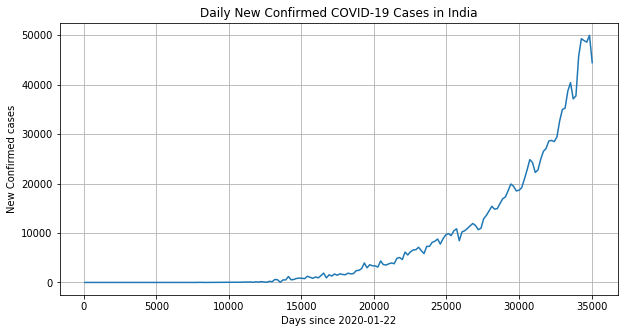

In [7]:
# 4. Daily new confirmed cases in India

Daily_new_confirmed_cases = data[data["Country/Region"]=="India"]["New cases"]
plt.figure(figsize=(10,5))
plt.plot(Daily_new_confirmed_cases)
plt.title("Daily New Confirmed COVID-19 Cases in India")
plt.xlabel("Days since 2020-01-22")
plt.ylabel("New Confirmed cases")
plt.grid(True)
plt.show()

In [8]:
# 5.Countries with 10k+ deaths

# Applying the condition for the column Deaths and checking it with "Country/Region"
data[data["Deaths"]>10000]["Country/Region"].unique()

array(['Italy', 'Spain', 'US', 'France', 'United Kingdom', 'Brazil',
       'Mexico', 'India', 'Iran', 'Peru', 'Russia'], dtype=object)

## Final Note:

Two code cells above represent initial failed attempts for **Task 3: Country with highest recovery rate**. These were intentionally kept to show the trial-and-error process involved in data analysis and problem-solving.

Later, the task was successfully completed using a cleaner and more accurate method, as seen in the final code cell under this task.